Alumno: Milton Aldair Mart√≠nez Acosta  

Matr√≠cula: 1870354

Estad√≠stica Aplicada

Grupo: 051

# Modelo ETS

## Error Trend Seasonality

## Irregular Tendencia Estacionalidad

Statsmodels proporciona una herramienta de descomposici√≥n estacional que podemos usar para separar los diferentes componentes de una serie de tiempo.

Aplicamos un modelo aditivo cuando parece que la tendencia es m√°s lineal y los componentes de estacionalidad y tendencia parecen ser constantes en el tiempo.

Un modelo multiplicativo es m√°s apropiado cuando estamos aumentando (o disminuyendo) a una tasa no lineal.

Para estos ejemplos, usaremos los datos del Indicador Global de la Actividad Econ√≥mica, que proporciona datos en porcentaje comparado al IGAE del 2013 desde enero de 2010 hasta diciembre de 2021.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
IGAE = pd.read_csv('https://raw.githubusercontent.com/Miltonmtz/Tareas_EstadisticaAplicada_22/main//IGAE.csv',index_col='Periodo mensual',parse_dates=True)

In [ ]:
IGAE.dropna(inplace=True)

In [ ]:
IGAE.head()

IGAE
Periodo mensual       
2010-01-01       86.87
2010-02-01       85.23
2010-03-01       92.29
2010-04-01       90.58
2010-05-01       92.30

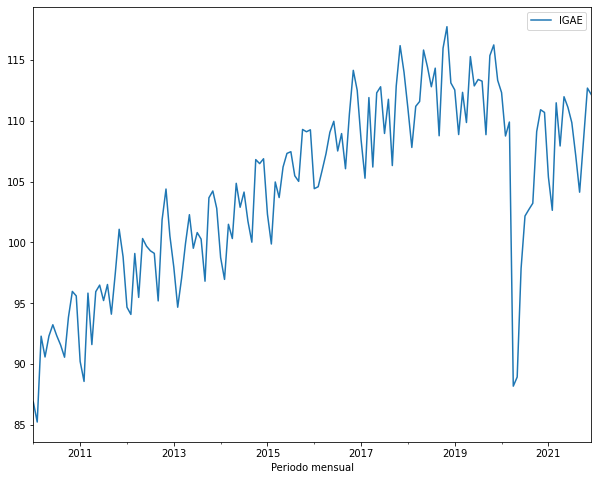

In [ ]:
IGAE.plot(figsize=(10,8));

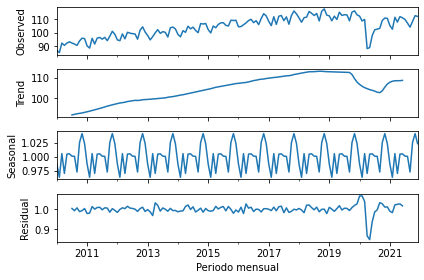

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(IGAE['IGAE'], model='multiplicative')  #mul tambien funciona
result.plot();


In [ ]:
#vamos a obtner la serie desestacionalida
#primero obtenemos el componente estacional al que accedemos con .seasonal del objeto result
componente_estacional = result.seasonal
IGAE['desestacionalizado'] = IGAE['IGAE'] / componente_estacional

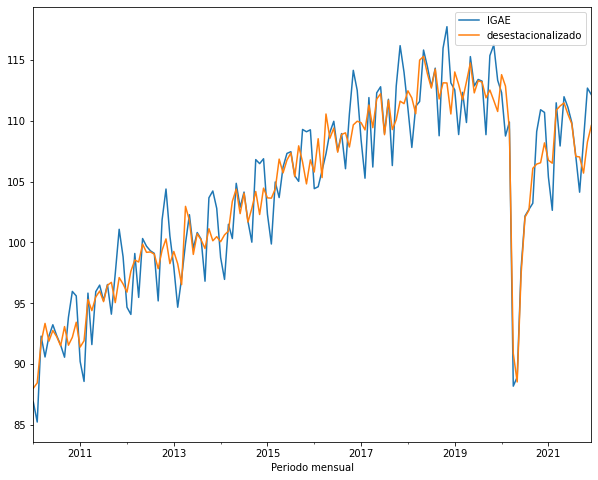

In [ ]:
#graficamos
IGAE[['IGAE','desestacionalizado']].plot(figsize=(10,8));

# Promedio M√≥vil Simple SMA 
## Simple moving average

In [ ]:
IGAE['PMS-6meses'] = IGAE['IGAE'].rolling(window=6).mean()
IGAE['PMS-12meses'] = IGAE['IGAE'].rolling(window=12).mean()

In [ ]:
IGAE.head(15)

IGAE  desestacionalizado  PMS-6meses  PMS-12meses
Periodo mensual                                                    
2010-01-01       86.87           88.010363         NaN          NaN
2010-02-01       85.23           88.446569         NaN          NaN
2010-03-01       92.29           91.786819         NaN          NaN
2010-04-01       90.58           93.340239         NaN          NaN
2010-05-01       92.30           91.880809         NaN          NaN
2010-06-01       93.23           92.756610   90.083333          NaN
2010-07-01       92.33           92.243459   90.993333          NaN
2010-08-01       91.56           91.498755   92.048333          NaN
2010-09-01       90.56           93.079435   91.760000          NaN
2010-10-01       93.85           91.547247   92.305000          NaN
2010-11-01       95.97           92.198160   92.916667          NaN
2010-12-01       95.60           93.437433   93.311667    91.697500
2011-01-01       90.21           91.394208   92.958333    91.975833
2011-02-01       88.57           91.912620   92.460000    92.254167
2011-03-01       95.83           95.307519   93.338333    92.549167

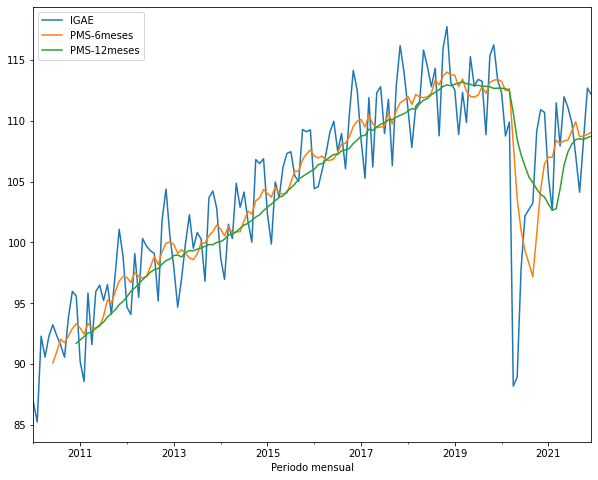

In [ ]:
IGAE[['IGAE','PMS-6meses','PMS-12meses']].plot(figsize=(10,8));

# Promedio M√≥vil Ponderado Exponencialmente EWMA
## Exponentially Weighted Moving Average

Acabamos de mostrar c√≥mo calcular el PMS para un periodo de tiempo T. Sin embargo, el PMS b√°sico tiene algunas debilidades:
* Periodos de tiempo muy peque√±os generar√°n m√°s ruido, en lugar de  brindarnos una se√±al de la tendencia de la serie
* Siempre tendra un ajuste hacia atr√°s 
* Nunca alcanzar√° el pico o valle completo de los datos debido al promedio.
* Realmente no informa sobre el posible comportamiento futuro de la serie, todo lo que hace es describir la tendencia pasada de los datos.
* Los valores hist√≥ricos extremos pueden sesgar el PMS

Una alternativa que soluciona o minimiza los problemas anteriores es el EWMA

En python  cuando damos adjust true
### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$

cuando damos adjust False
### $\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

para aplicar EWMA usamos la funci√≥n EWM

In [ ]:
IGAE['EWMA12'] = IGAE['IGAE'].ewm(span=12,adjust=False).mean()

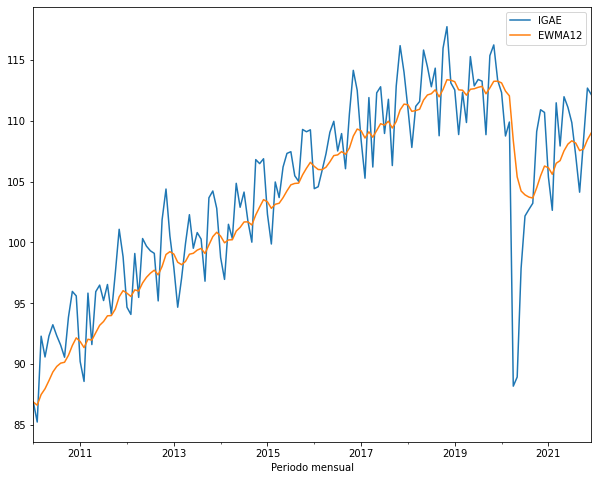

In [ ]:
IGAE[['IGAE','EWMA12']].plot(figsize=(10,8));

## Comparemos PMS to EWMA

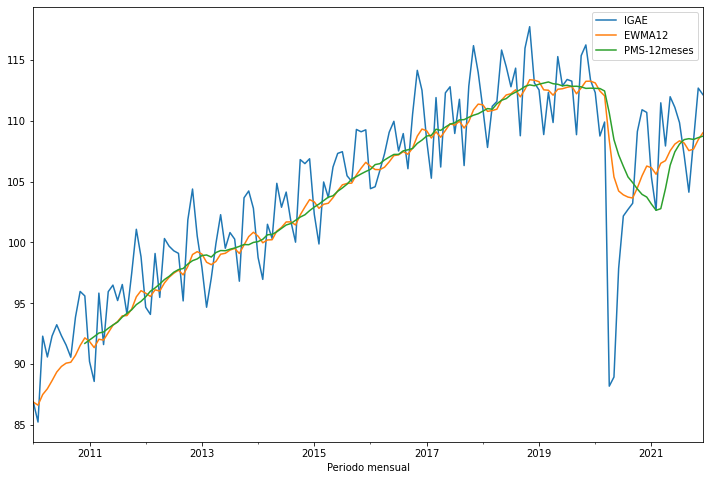

In [ ]:
IGAE[['IGAE','EWMA12','PMS-12meses']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

# M√©todos Holt-Winters 

En esta secci√≥n, veremos el suavizado exponencial doble y triple con los m√©todos de Holt-Winters.

En el suavizado exponencial doble (tambi√©n conocido como m√©todo de Holt) presentamos un nuevo factor de suavizado ùõΩ (beta) que aborda la tendencia:
\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    nivel}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    tendencia}\\
y_t &= l_t + b_t & \text{   modelo estimado}\\
\hat y_{t+h} &= l_t + hb_t & \text{    modelo de pron√≥stico (} h = \text{# periodos futuros)}\end{split}

Debido a que a√∫n no hemos considerado las fluctuaciones estacionales, el modelo de pron√≥stico es simplemente una l√≠nea recta que se extiende desde el punto de datos m√°s reciente.

Con el suavizado exponencial triple (tambi√©n conocido como el m√©todo Holt-Winters) introducimos un factor de suavizado ùõæ (gamma) que aborda la estacionalidad:
\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    nivel}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    tendencia}\\
c_t &= (1-\gamma)c_{t-L} + \gamma(x_t-l_{t-1}-b_{t-1}) & \text{    estacionalidad}\\
y_t &= (l_t + b_t) c_t & \text{    modelo estimado}\\
\hat y_{t+m} &= (l_t + mb_t)c_{t-L+1+(m-1)modL} & \text{    modelo de pron√≥stico (} m = \text{# periodos futuros)}\end{split}
$L$ representa el n√∫mero de frecuencia de la serie por periodo. En nuestro caso tenemos datos mensuales, por tanto debemos usar $L=12$.

En general, valores muy grandes de $\alpha$, $\beta$ y $\gamma$, dan mas peso a las observaciones presentes.

Antes de ejecutar el m√©todo de holt winters tenemos que establecer la frecuencia de los datos

In [ ]:
IGAE.index

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', name='Periodo mensual', length=144, freq=None)

note que en **freq** no esta especificado

In [ ]:
IGAE.index.freq = 'MS'
IGAE.index

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', name='Periodo mensual', length=144, freq='MS')

## Promedio exponencial simple

La funci√≥n statmodels Holt-Winters nos permite hacer el suavizamiento exponencial simple. es el equivalente al que usamos con pandas  <tt>.ewm()</tt> 

$\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)


IGAE['SES12']=SimpleExpSmoothing(IGAE['IGAE']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
IGAE.head()

IGAE  desestacionalizado  PMS-6meses  PMS-12meses  \
Periodo mensual                                                       
2010-01-01       86.87           88.010363         NaN          NaN   
2010-02-01       85.23           88.446569         NaN          NaN   
2010-03-01       92.29           91.786819         NaN          NaN   
2010-04-01       90.58           93.340239         NaN          NaN   
2010-05-01       92.30           91.880809         NaN          NaN   

                    EWMA12      SES12  
Periodo mensual                        
2010-01-01       86.870000  86.870000  
2010-02-01       86.617692  86.617692  
2010-03-01       87.490355  87.490355  
2010-04-01       87.965685  87.965685  
2010-05-01       88.632503  88.632503

## Double Exponential Smoothing
Donde el suavizado exponencial simple emplea solo un factor de suavizado $\alpha$ (alfa), el suavizado exponencial doble agrega un segundo factor de suavizado $\beta$ (beta) que aborda las tendencias en los datos. Al igual que el factor alfa, los valores del factor beta se encuentran entre cero y uno ($0<\beta‚â§1$). La ventaja es  que ahora el modelo puede anticipar futuros aumentos o disminuciones.

Tambi√©n podemos abordar diferentes tipos de cambio (crecimiento/decadencia) en la tendencia. Si una serie de tiempo muestra una tendencia inclinada en l√≠nea recta, usar√≠a un ajuste <strong>aditivo</strong>. Si la serie temporal muestra una tendencia exponencial (curva), usar√≠a un ajuste <strong>multiplicativo</strong>.

A medida que avanzamos hacia el pron√≥stico, vale la pena se√±alar que tanto los ajustes aditivos como los multiplicativos pueden exagerarse con el tiempo y requieren <em>amortiguaci√≥n</em> que reduce el tama√±o de la tendencia en per√≠odos futuros hasta que alcanza una l√≠nea plana.

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

IGAE['DESadd12'] = ExponentialSmoothing(IGAE['IGAE'], trend='add').fit().fittedvalues.shift(-1)
IGAE.head()

IGAE  desestacionalizado  PMS-6meses  PMS-12meses  \
Periodo mensual                                                       
2010-01-01       86.87           88.010363         NaN          NaN   
2010-02-01       85.23           88.446569         NaN          NaN   
2010-03-01       92.29           91.786819         NaN          NaN   
2010-04-01       90.58           93.340239         NaN          NaN   
2010-05-01       92.30           91.880809         NaN          NaN   

                    EWMA12      SES12   DESadd12  
Periodo mensual                                   
2010-01-01       86.870000  86.870000  87.172071  
2010-02-01       86.617692  86.617692  86.191476  
2010-03-01       87.490355  87.490355  89.977456  
2010-04-01       87.965685  87.965685  90.505343  
2010-05-01       88.632503  88.632503  91.739932

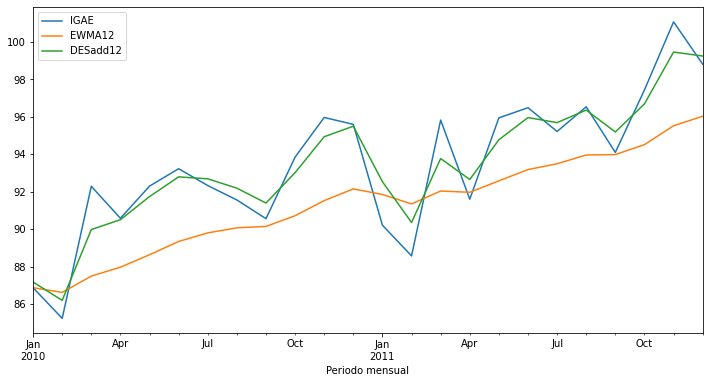

In [ ]:
IGAE[['IGAE','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

podemos ver que el suavizado exponencial doble es una representaci√≥n mejor de los datos de la serie temporal.

Esto es as√≠ por que estamos modelando todos los componentes de la serie

Veamos si usar un ajuste estacional multiplicativo ayuda.

In [ ]:
IGAE['DESmul12'] = ExponentialSmoothing(IGAE['IGAE'], trend='mul').fit().fittedvalues.shift(-1)
IGAE.head()

IGAE  desestacionalizado  PMS-6meses  PMS-12meses  \
Periodo mensual                                                       
2010-01-01       86.87           88.010363         NaN          NaN   
2010-02-01       85.23           88.446569         NaN          NaN   
2010-03-01       92.29           91.786819         NaN          NaN   
2010-04-01       90.58           93.340239         NaN          NaN   
2010-05-01       92.30           91.880809         NaN          NaN   

                    EWMA12      SES12   DESadd12   DESmul12  
Periodo mensual                                              
2010-01-01       86.870000  86.870000  87.172071  87.032324  
2010-02-01       86.617692  86.617692  86.191476  86.071564  
2010-03-01       87.490355  87.490355  89.977456  89.901104  
2010-04-01       87.965685  87.965685  90.505343  90.426439  
2010-05-01       88.632503  88.632503  91.739932  91.666164

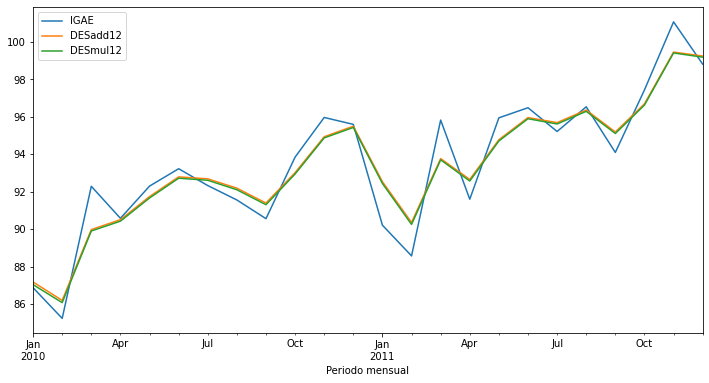

In [ ]:
IGAE[['IGAE','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

## Triple Exponential Smoothing
El suavizado exponencial triple es el m√©todo m√°s estrechamente asociado con Holt-Winters, agrega compatibilidad con las tendencias y la estacionalidad de los datos.

In [ ]:
IGAE['TESadd12'] = ExponentialSmoothing(IGAE['IGAE'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
IGAE.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


IGAE  desestacionalizado  PMS-6meses  PMS-12meses  \
Periodo mensual                                                       
2010-01-01       86.87           88.010363         NaN          NaN   
2010-02-01       85.23           88.446569         NaN          NaN   
2010-03-01       92.29           91.786819         NaN          NaN   
2010-04-01       90.58           93.340239         NaN          NaN   
2010-05-01       92.30           91.880809         NaN          NaN   

                    EWMA12      SES12   DESadd12   DESmul12   TESadd12  
Periodo mensual                                                         
2010-01-01       86.870000  86.870000  87.172071  87.032324  88.797162  
2010-02-01       86.617692  86.617692  86.191476  86.071564  83.987582  
2010-03-01       87.490355  87.490355  89.977456  89.901104  90.169739  
2010-04-01       87.965685  87.965685  90.505343  90.426439  90.729258  
2010-05-01       88.632503  88.632503  91.739932  91.666164  94.700937

In [ ]:
IGAE['TESmul12'] = ExponentialSmoothing(IGAE['IGAE'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
IGAE.head()

IGAE  desestacionalizado  PMS-6meses  PMS-12meses  \
Periodo mensual                                                       
2010-01-01       86.87           88.010363         NaN          NaN   
2010-02-01       85.23           88.446569         NaN          NaN   
2010-03-01       92.29           91.786819         NaN          NaN   
2010-04-01       90.58           93.340239         NaN          NaN   
2010-05-01       92.30           91.880809         NaN          NaN   

                    EWMA12      SES12   DESadd12   DESmul12   TESadd12  \
Periodo mensual                                                          
2010-01-01       86.870000  86.870000  87.172071  87.032324  88.797162   
2010-02-01       86.617692  86.617692  86.191476  86.071564  83.987582   
2010-03-01       87.490355  87.490355  89.977456  89.901104  90.169739   
2010-04-01       87.965685  87.965685  90.505343  90.426439  90.729258   
2010-05-01       88.632503  88.632503  91.739932  91.666164  94.700937   

                  TESmul12  
Periodo mensual             
2010-01-01       90.112481  
2010-02-01       84.170973  
2010-03-01       89.659648  
2010-04-01       90.584201  
2010-05-01       94.497128

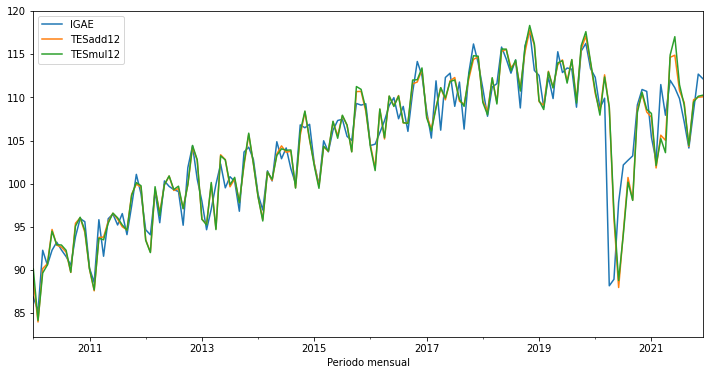

In [ ]:
IGAE[['IGAE','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

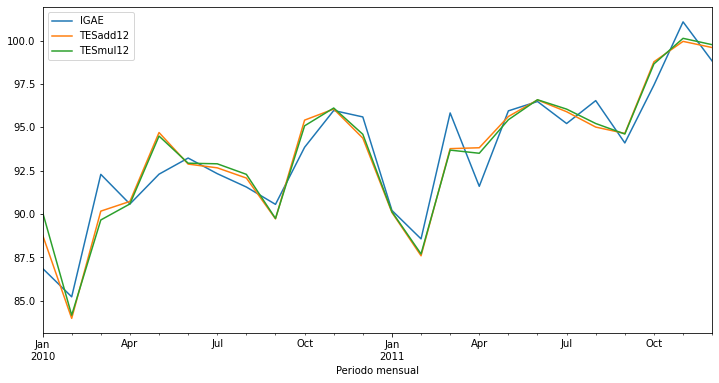

In [ ]:
IGAE[['IGAE','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Seg√∫n el gr√°fico anterior, podr√≠a pensarse que el suavizado exponencial triple hace un trabajo de ajuste peor que el suavizado exponencial doble. La clave aqu√≠ es considerar lo que viene a continuaci√≥n: el pron√≥stico. Veremos que tener la capacidad de predecir patrones estacionales fluctuantes mejora enormemente nuestro pron√≥stico.

## pron√≥stico

In [ ]:
#volvemos a estimar los modelos, pero guardandolos en un objeto
modelo_DESadd12 = ExponentialSmoothing(IGAE['IGAE'], trend='add').fit()
modelo_TESmul12 = ExponentialSmoothing(IGAE['IGAE'],trend='mul',seasonal='mul',seasonal_periods=12).fit()


una vez guardados, hacemos el pron√≥stico


In [ ]:
pronostico_DESadd12 = modelo_DESadd12.forecast(36).rename('predicci√≥n DES')
pronostico_TESmul12 = modelo_TESmul12.forecast(36).rename('predicci√≥n TES')


ahora graficamos


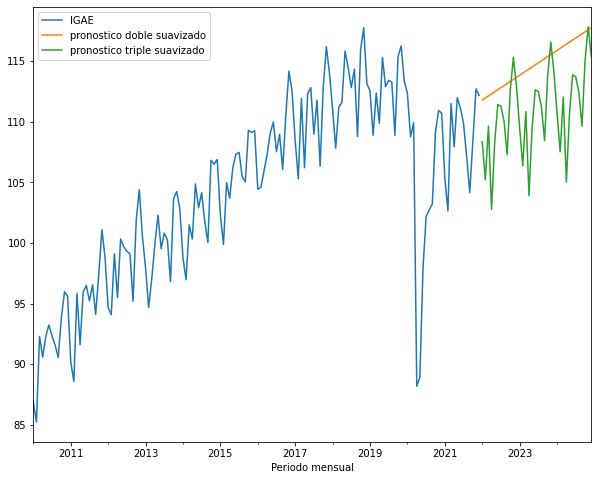

In [ ]:
IGAE['IGAE'].plot(figsize=(10,8));
pronostico_DESadd12.plot(label ='pronostico doble suavizado');
pronostico_TESmul12.plot(label ='pronostico triple suavizado');
plt.legend(loc = 'upper left')


Obviamente como el modelo de doble suavizamiento exponencial (DES) solo contempla la tendencia, el pron√≥stico es la tendencia

el modelo de triple suavizado exponencial (TES) considera el factor estacional, pron√≥stica considerando el efecto estacional